Проект 5

Задачи:
1. Провести анализ поведения пользователей по доставке еды на дом
2. Оценить эффективность каналов их привлечения

In [ ]:
import pandas as pd # импортируем библиотеки для работы с датафреймом, считываем файл с данными, преобразуем столбец с датой в необходимый формат, чтобы можно было с ним работать
import numpy as np
import datetime as dt

case= pd.read_csv('C:/Users/user/Documents/data/SF_case_data.csv',sep=',')
display(case)

case['date']=pd.to_datetime(case['date'])
case.info()

,date,event,purchase_sum,os_name,device_id,gender,city,utm_source
0,2020-01-01,app_start,NaN,android,669460,female,Moscow,-
1,2020-01-01,app_start,NaN,ios,833621,male,Moscow,vk_ads
2,2020-01-01,app_start,NaN,android,1579237,male,Saint-Petersburg,referal
3,2020-01-01,app_start,NaN,android,1737182,female,Moscow,facebook_ads
4,2020-01-01,app_start,NaN,ios,4029024,female,Moscow,facebook_ads
...,...,...,...,...,...,...,...,...
2747963,2020-03-31,register,NaN,android,2984778,male,Saint-Petersburg,facebook_ads
2747964,2020-03-31,register,NaN,ios,27301864,male,Moscow,-
2747965,2020-03-31,register,NaN,ios,1294285,female,Saint-Petersburg,google_ads
2747966,2020-03-31,register,NaN,android,3010574,female,Saint-Petersburg,google_ads


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747968 entries, 0 to 2747967
Data columns (total 8 columns):
 #   Column        Dtype         
---  ------        -----         
 0   date          datetime64[ns]
 1   event         object        
 2   purchase_sum  float64       
 3   os_name       object        
 4   device_id     int64         
 5   gender        object        
 6   city          object        
 7   utm_source    object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 167.7+ MB


In [ ]:
import matplotlib.pyplot as plt # закачиваем библиотеки для визуализации
import seaborn as sns
%matplotlib inline
import plotly
import plotly.express as px


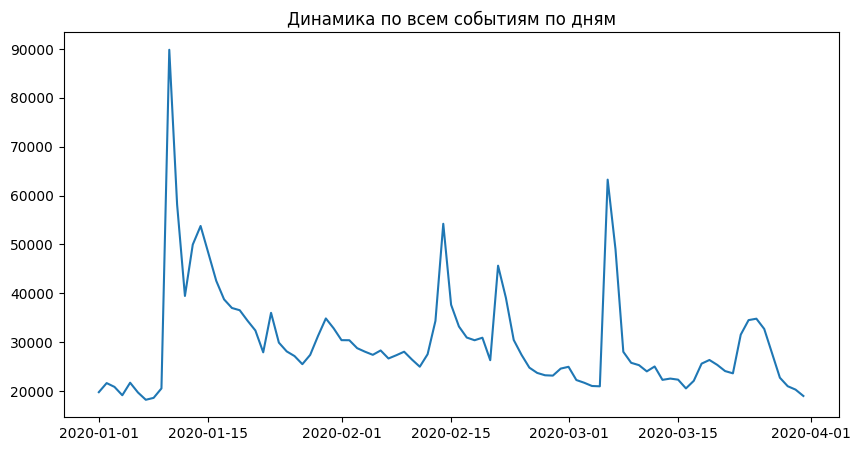

In [ ]:
# группируем по дням количество всех событий(установка приложения app_install, открытие приложения app_start, покупка purchase, tap_basket перейти в корзину,registration регистрация, search перейти на страницу поиска, open_item открыть товар, choose_item отправить товар в корзину )
# строим график с динамикой по всем событиям по дням
data_events = case.groupby('date')['event'].count()


plt.figure(figsize = (10,5))


plt.plot(data_events)
plt.title('Динамика по всем событиям по дням')
plt.show()

Таким образом, пик событий приходится на первую половину января 2020г, затем большие значения достигаются во второй половине февраля и в первой половине марта, что может быть связано с праздничными днями в эти месяцы и длительными выходными у пользователей.
То есть различные рекламные объявления можно запускать в преддверии этих праздников, где заинтересованность пользователей и прибыль будет максимальной. А вот акции можно запускать между праздничными днями для того, чтобы повысить прибыль в период затишья заинтересованности.

<Axes: >

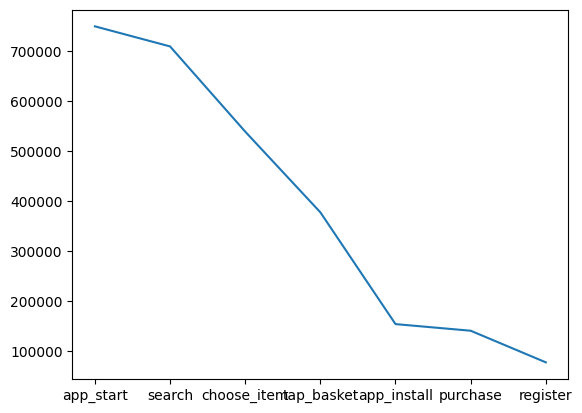

In [ ]:
case['event'].value_counts().plot() # распределение всех пользователей по всем событиям

Таким образом, видим, что  больше всего пользователей открыли приложение и перешли на страницу поиска, меньше всего событий по регистрации приложения и покупкам.

In [ ]:
# Построим график с динамикой открытий приложений для групп «Установили в тот же день» и «Остальные».
# Сначала мы находим дату, когда были установлены приложения:
installs = case[case['event'] == 'app_install']
case['install_date'] = case['device_id'].map(installs.set_index('device_id')['date'])
case

# После этого мы пишем функцию, которая покажет, какие пользователи «Установили в тот же день» и применяем ее к нашему датафрейму:
def new_column(date1,date2,value):
    if date1 == date2:
        return value

case['install_group'] = case.apply(lambda x: new_column(date1 = x['date'], date2 = x['install_date'], value = 'Установили в этот же день'), axis=1)

# Далее заполняем пропуски в колонке ‘install_group’ и заменяем их на ‘Остальные’.
case['install_group'] = case['install_group'].fillna('Остальные')

# После чего мы создаем новый датафрейм, чтобы отобразить динамику по дням:
df = case[case['event'] == 'app_start'].groupby(['date','install_group']).size().reset_index(name = 'users')

In [ ]:
df

,date,install_group,users
0,2020-01-01,Остальные,866
1,2020-01-01,Установили в этот же день,3579
2,2020-01-02,Остальные,1957
3,2020-01-02,Установили в этот же день,3144
4,2020-01-03,Остальные,2742
...,...,...,...
177,2020-03-29,Установили в этот же день,1117
178,2020-03-30,Остальные,4710
179,2020-03-30,Установили в этот же день,994
180,2020-03-31,Остальные,4322


In [ ]:
# строим график распределения пользователей, установивших приложение в тот же день и остальных по датам, то есть трафика
fig = px.line(df, x='date', y='users', color='install_group',
              labels={'date': 'Date', 'users': 'Users'},
              title='Динамика открытий приложения по группам')


fig.show()

Таким образом, видим что пользователей, установивших приложение в тот же день меньше, чем остальных. Но они открывали приложение больше в первой половине января. Востальном открытия приложений среди групп происходят параллельно.

In [ ]:
# Какая доля открытий приложения 14 февраля пришлась на пользователей, у которых приложение уже было установлено.

# В данном задании сначала нам нужно воспользоваться нашим датафреймом case и выделить оттуда пользователей, которые открыли приложение:
traffic=case[case['event']=='app_start']
traffic

# Потом мы создаем два новых датафрейма, где считаем количество инсталлов/установок (app_install) и количество открытий по дням:
same_day= installs.groupby(['date'])['device_id'].count().reset_index()
total= traffic.groupby(['date'])['device_id'].count().reset_index()
same_day


# Потом мы соединяем оба датафрейма в один и переименовываем столбцы:
app_open_perc=same_day.merge(total,how='left',on='date')
app_open_perc.rename(columns={'device_id_x':'same_day', 'device_id_y': 'total'},inplace=True)
app_open_perc



# Далее мы вычитаем из общего количества количество тех, кто установил в тот же день:
app_open_perc['other']=app_open_perc['total']-app_open_perc['same_day']
app_open_perc

# И на последнем этапе находим долю открытий приложений:
app_open_perc['percent']=round(app_open_perc['other']/app_open_perc['total']*100)


app_open_perc[app_open_perc['date']=='2020-02-14']



,date,same_day,total,other,percent
44,2020-02-14,4188,14470,10282,71.0


In [ ]:
# В какой день доля трафика от инсталлов была наибольшей?

# Чтобы выполнить данное задание нам нужно воспользоваться уже существующим датафреймом df и создать из него два отдельных датафрейма:
gr1 = df[df['install_group'] == 'Остальные']
gr2 = df[df['install_group'] != 'Остальные']
gr1

# После этого мы объединяем новые датафреймы по дате:
stat = gr1.merge(gr2, how = 'left', on = 'date')
stat

# Теперь считаем долю трафика от инсталлов/установок по дням и находим, в какой день она наибольшая:
stat['Доля трафика с инсталлов, %'] = stat['users_y']/(stat['users_y'] +stat['users_x'])
stat.sort_values('Доля трафика с инсталлов, %', ascending = True)

# ответ: 2020-01-01

,date,install_group_x,users_x,install_group_y,users_y,"Доля трафика с инсталлов, %"
75,2020-03-16,Остальные,5786,Установили в этот же день,360,0.058575
76,2020-03-17,Остальные,6111,Установили в этот же день,431,0.065882
64,2020-03-05,Остальные,5759,Установили в этот же день,411,0.066613
73,2020-03-14,Остальные,6166,Установили в этот же день,443,0.067030
61,2020-03-02,Остальные,6015,Установили в этот же день,453,0.070037
...,...,...,...,...,...,...
13,2020-01-14,Остальные,7764,Установили в этот же день,5173,0.399861
2,2020-01-03,Остальные,2742,Установили в этот же день,2402,0.466952
9,2020-01-10,Остальные,8323,Установили в этот же день,13106,0.611601
1,2020-01-02,Остальные,1957,Установили в этот же день,3144,0.616350


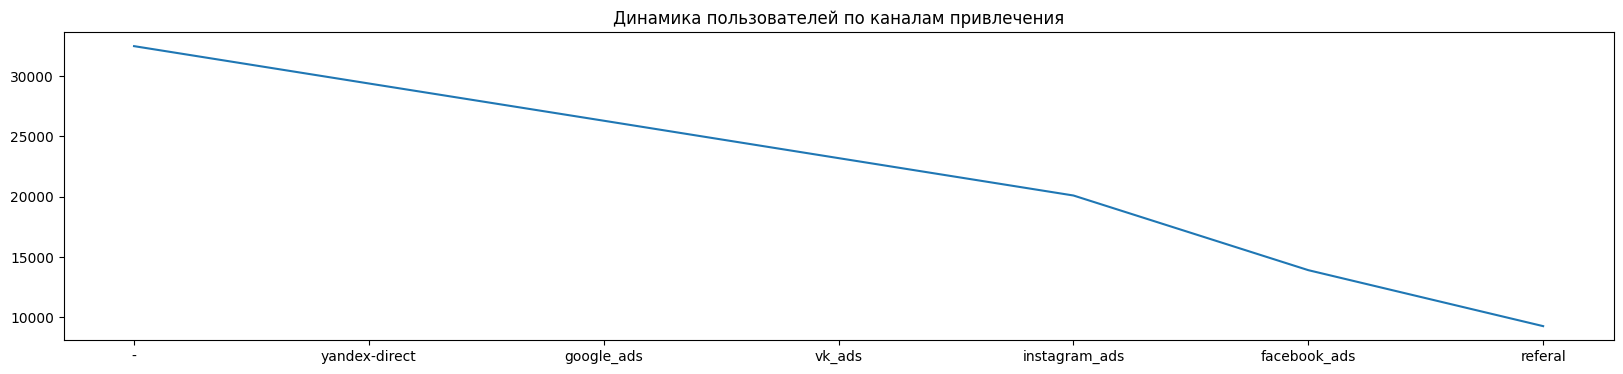

,users
utm_source,
-,41456
yandex-direct,34441
google_ads,31437
vk_ads,27905
instagram_ads,24818
facebook_ads,18844
referal,11983


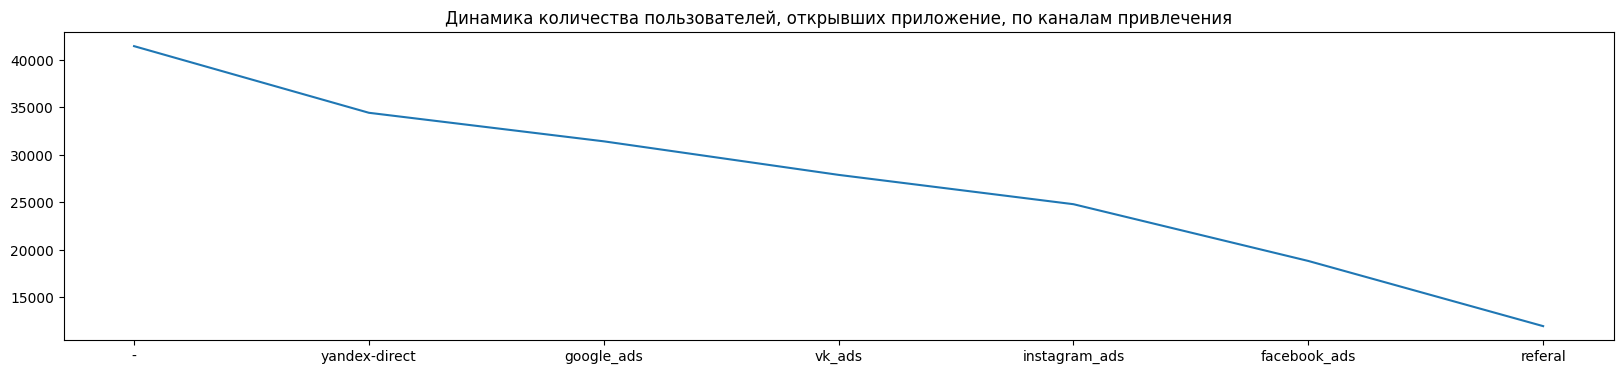

In [ ]:
# С какого канала в Q1 пришло больше всего пользователей? Впишите в поля ниже один ответ из возможных вариантов: Яндекс, Гугл, ВК, Фейсбук, Инстаграм, Реферальная программа.

# Q1-это первый квартал.


# Итак, в этом задании нам нужно посчитать количество пользователей, установивших приложение по датам и каналам. Для этого мы выбираем пользователей, которые установили приложение и их группируем:
df_install = case[case['event'] == 'app_install'].groupby(['date','utm_source']).size().reset_index(name = 'users')
df_install

# После этого мы создаем pivot таблицу, где считаем суммарное количество пользователей пришедших с разных каналов по дням:
df_install = pd.pivot_table(df_install, values='users', index='utm_source', aggfunc='sum').sort_values('users',ascending = False)
plt.figure(figsize = (20,4))


plt.plot(df_install)
plt.title('Динамика пользователей по каналам привлечения')
plt.show()


# # Вопрос 2. С какого канала было больше всего первых открытий приложения?

# Здесь мы проделываем то же самое. Сначала выбираем пользователей, которые открыли приложение и группируем по дате и каналу, с которого эти пользователи пришли:
df_app_start = case[case['event'] == 'app_start'].drop_duplicates('device_id').groupby(['date','utm_source']).size().reset_index(name = 'users')

# После этого снова делаем pivot таблицу:
df_app_start = pd.pivot_table(df_app_start, values='users', index='utm_source', aggfunc='sum').sort_values('users',ascending = False)

display(df_app_start)

plt.figure(figsize = (20,4))


plt.plot(df_app_start)
plt.title('Динамика количества пользователей, открывших приложение, по каналам привлечения')
plt.show()




Таким образом видим, что с канала Яндекс приходит больше всего пользователей и с Реферальной программы -меньше всего.
Соответственно из второго графика видим, что с канала Яндекс происходит больше всего первых открытий приложений, и меньше всего с Реферальной программы.

In [ ]:
#  На каком шаге отваливается больше всего зарегистрированных и незарегистрированных пользователей, т.е. посчитать конверсионные показатели на всех этапах отдельно для зарегистрированных пользователей и незарегистрированных.

#  Находим пользователей, которые зарегистрированы и добавляем новый столбец с 1, что означает, что они зарегистрированы.
first_registration = case[case['event'] == 'register'].sort_values('date').drop_duplicates('device_id')
first_registration['finally_registered'] = 1


# Добавляем столбец с датой регистрации в таблицу case и добавляем еще один столбец 'finally_registered' с значением 1, который обозначает, что регистрация была. Для этого используем функцию map.
case['first_registration'] = case['device_id'].map(first_registration.set_index('device_id')['date'])
case['finally_registered'] =case['device_id'].map(first_registration.set_index('device_id')['finally_registered'])


#  После этого мы сравниваем дату 'first_registration' с 'date', и обозначаем зарегистрированных пользователей -1, а незарегистрированных 0
already_reg = case[case['first_registration'] < case['date']]
already_reg['registered'] = 1
requires_reg1 = case[(case['first_registration'].isna() == True)]
requires_reg1['registered'] = 0
requires_reg2 =  case[case['first_registration'] >= case['date']]
requires_reg2['registered'] = 0


#  Далее мы объединяем полученные в таблицу case и выбираем тех, кто дошли до покупки.
case = pd.concat([already_reg,requires_reg1,requires_reg2])

# После этого подсчитываем зарегистрированных и незарегистрированных пользователей на всех этапах
case[case['event'] == 'tap_basket'].groupby('registered').count()

#  Теперь, чтобы подготовить финальную таблицу с количеством пользователей на разных этапах для расчета конверсии зарегистрированных пользователей,
# создаем новую табличку, выбираем только зарегистрированных и с помощью функции crosstab делаем объединение таблиц.
reg = case[case['registered'] == 1]
funnel_reg = pd.crosstab(reg.utm_source, reg.event, values=reg.device_id, aggfunc=pd.Series.nunique)

# Теперь рассчитываем конверсию на каждом этапе для зарегестрированных пользователей
funnel_reg['1 step'] = (funnel_reg['search'])*100/funnel_reg['app_start']
funnel_reg['2 step'] = (funnel_reg['choose_item'])*100/funnel_reg['search']
funnel_reg['3 step'] = (funnel_reg['tap_basket'])*100/funnel_reg['choose_item']
funnel_reg['4 step'] = (funnel_reg['purchase'])*100/funnel_reg['tap_basket']

display(funnel_reg)

# После этого проделываем то же самое, но с незарегистрированными пользователями.
reg_no = case[case['registered'] == 0]
funnel_reg_no = pd.crosstab(reg_no.utm_source, reg_no.event, values=reg_no.device_id, aggfunc=pd.Series.nunique)

funnel_reg_no['1 step'] = (funnel_reg_no['search'])*100/funnel_reg_no['app_start']
funnel_reg_no['2 step'] = (funnel_reg_no['choose_item'])*100/funnel_reg_no['search']
funnel_reg_no['3 step'] = (funnel_reg_no['tap_basket'])*100/funnel_reg_no['choose_item']

funnel_reg_no['4 step'] = (funnel_reg_no['register'])*100/funnel_reg_no['tap_basket']
funnel_reg_no['5 step'] = (funnel_reg_no['purchase'])*100/funnel_reg_no['register']
funnel_reg_no


C:\Users\user\AppData\Local\Temp\ipykernel_17464\563805499.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\user\AppData\Local\Temp\ipykernel_17464\563805499.py:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\user\AppData\Local\Temp\ipykernel_17464\563805499.py:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

event,app_start,choose_item,purchase,search,tap_basket,1 step,2 step,3 step,4 step
utm_source,,,,,,,,,
-,9482,8728,5492,9355,7850,98.660620,93.297702,89.940422,69.961783
facebook_ads,5606,5154,3333,5527,4694,98.590796,93.251312,91.074893,71.005539
google_ads,5399,4948,3121,5335,4438,98.814595,92.746017,89.692805,70.324470
instagram_ads,5686,5288,3548,5618,4842,98.804080,94.126023,91.565809,73.275506
referal,3647,3417,2382,3610,3155,98.985468,94.653740,92.332455,75.499208
vk_ads,6011,5636,3950,5958,5196,99.118283,94.595502,92.193045,76.020015
yandex-direct,5396,4928,3099,5304,4464,98.295033,92.911011,90.584416,69.422043


event,app_install,app_start,choose_item,purchase,register,search,tap_basket,1 step,2 step,3 step,4 step,5 step
utm_source,,,,,,,,,,,,
-,32460,48670,38026,14073,16527,46742,29223,96.038627,81.352959,76.850050,56.554769,85.151570
facebook_ads,13916,23780,18713,7506,8672,22822,14592,95.971405,81.995443,77.977876,59.429825,86.554428
google_ads,26286,35778,27416,9777,11405,34217,20765,95.636984,80.123915,75.740444,54.924151,85.725559
instagram_ads,20096,29237,22858,9394,10750,28017,17881,95.827205,81.586180,78.226442,60.119680,87.386047
referal,9282,14866,11880,5503,6193,14316,9518,96.300283,82.984074,80.117845,65.066190,88.858389
vk_ads,23189,32353,25422,10919,12421,31010,20014,95.848917,81.980006,78.727087,62.061557,87.907576
yandex-direct,29368,38578,29591,10581,12342,36933,22417,95.735912,80.120759,75.756142,55.056430,85.731648


Таким образом,  на  шаге покупки отваливается больше всего зарегистрированных пользователей, и на шаге регистрация-незарегистрированных пользователей.
Возможно, чтобы зарегистрированный пользователь более охотно совершал покупки, необходимо отправлять пуш-уведомления о мнижении цены на часто кликаемые им товары, можно предложить карту лояльности.
Для незарегистрированных пользователей, предложить удобную регистрацию, при этом рассказать о том, что при регистрации на все товары распространяется скидка.

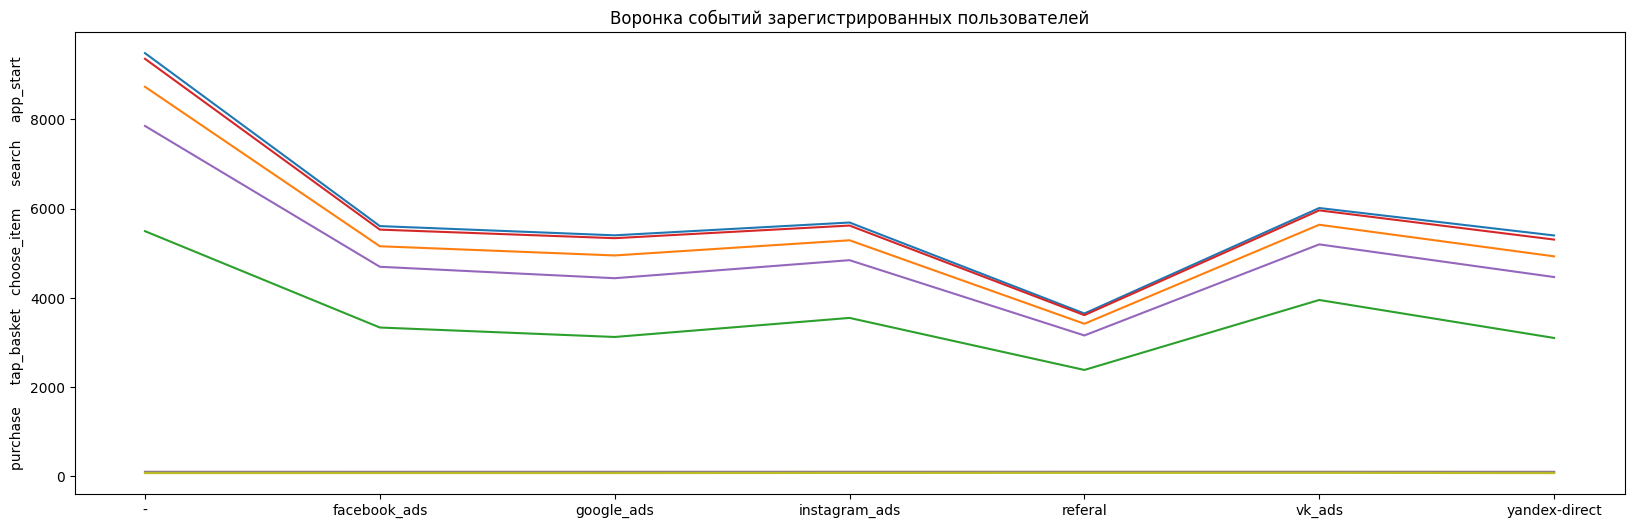

In [ ]:
# строим график событий зарегистрированных пользователей по каналам привлечения
plt.figure(figsize = (20,6))


plt.plot(funnel_reg)
plt.title('Воронка событий зарегистрированных пользователей')
plt.ylabel("purchase     tap_basket   choose_item     search    app_start")
plt.show()

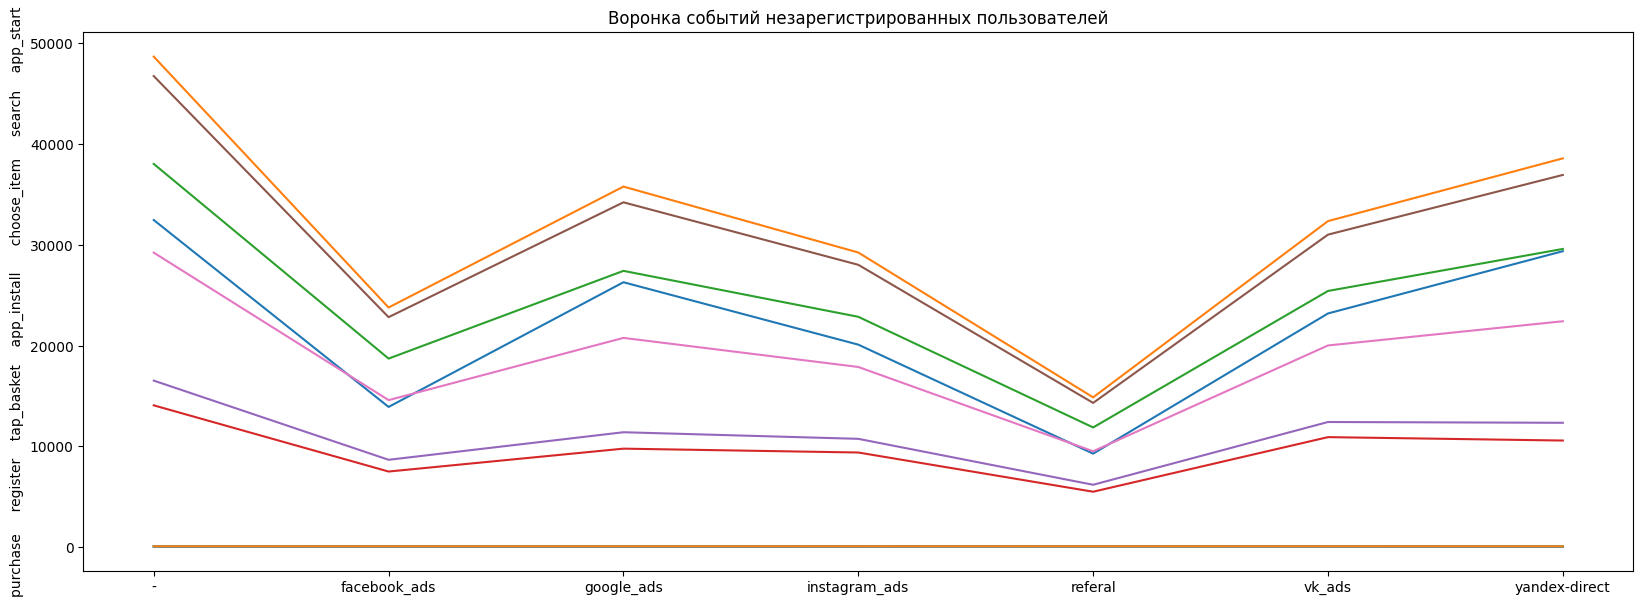

In [ ]:
plt.figure(figsize = (20,7))


plt.plot(funnel_reg_no)
plt.title('Воронка событий незарегистрированных пользователей')
plt.ylabel("purchase     register    tap_basket    app_install      choose_item     search    app_start")
plt.show()

In [ ]:
# Пользователи, пришедшие с каких каналов, показали (за весь Q1) самую высокую и самую низкую конверсию в первую покупку?

# считаем количество пользователей, впервые открывших приложение
first_opens = case[case['event'] == 'app_start'].sort_values('date').drop_duplicates('device_id').groupby(['utm_source']).size().reset_index(name = 'users')

# считаем количество пользователей, впервые совершивших покупку
first_purchase = case[case['event'] == 'purchase'].sort_values('date').drop_duplicates('device_id').groupby(['utm_source']).size().reset_index(name = 'users')

# объединяем эти две таблицы
stat = first_opens.merge(first_purchase, how = 'left', on = 'utm_source')

# находим конверсию в первую покупку по каналам привлечения
stat['CR to first purchase'] = stat['users_y']/stat['users_x']

stat

,utm_source,users_x,users_y,CR to first purchase
0,-,41456,14786,0.356667
1,facebook_ads,18844,7903,0.419391
2,google_ads,31437,10167,0.323409
3,instagram_ads,24818,9820,0.395681
4,referal,11983,5803,0.484269
5,vk_ads,27905,11460,0.410679
6,yandex-direct,34441,10936,0.317529


In [ ]:
# строим график конверсии в покупку пользователей, открывших приложение и совершивших первую покупку
fif=px.line(
    data_frame=stat,
    x='utm_source',
    y=['users_x','users_y'],
    height=500,
    width=1000,
    title='Конверсия в покупку пользователей , открывших приложение, и совершивших первую покупку'
)
fif.show()

Таким образом, конверсия в покупку у пользователей впервые открывших приложение больше, чем у пользователей, совершивших первую покупку.
При этом, самый лучший канал по конверсии в первую покупку у данных групп примерно одинаков, и это Яндекс, Гугл и ВК.
Самый худший канал- Реферальная программа.

In [ ]:
# Пользователи, пришедшие с какого канала, имеют медианный первый чек выше?

# считаем медианный чек пользователей, впервые совершивших покупку
first_purchase_median = case[case['event'] == 'purchase'].sort_values('date').drop_duplicates('device_id').groupby(['utm_source']).median().reset_index()
first_purchase_median

C:\Users\user\AppData\Local\Temp\ipykernel_17464\3969639047.py:4: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,utm_source,purchase_sum,device_id,finally_registered,registered
0,-,398.5,10972119.0,1.0,0.0
1,facebook_ads,389.0,10844491.0,1.0,0.0
2,google_ads,390.5,11089575.0,1.0,0.0
3,instagram_ads,393.5,11096726.0,1.0,0.0
4,referal,395.5,10491527.0,1.0,0.0
5,vk_ads,393.0,11334978.0,1.0,0.0
6,yandex-direct,392.5,10969061.5,1.0,0.0


In [ ]:
# строим график медианного чека первой покуаки по каналам
mdn=px.line(
    data_frame=first_purchase_median,
    x='utm_source',
    y=['purchase_sum'],
    height=500,
    width=1000,
    title='Медианный чек первой покупки пользователей по каналам'
)
mdn.show()

Таким образом, видим, что медианный чек первой покупки пользователей выше всего по каналу Реферальной программы и Яндекс. Самый низкий -у Фейсбук.

In [ ]:
# Какой платный канал привлечения имеет самый высокий  и самый низкий ROMI? ROMI = (Доход от вложений - размер вложений) / Размер вложений * 100%

case[case['event']=='purchase'].drop_duplicates('device_id')['utm_source'].value_counts()

#  Фильтруем наш датафрейм по событию покупки:
data_purchase = case.loc[case['event'] == 'purchase']


#  После этого группируем наши данные по каналам привлечения и считаем сумму покупок по каждому каналу:
data_purchase_sum = data_purchase.groupby('utm_source')['purchase_sum'].sum().reset_index()

display(data_purchase_sum)

#  А потом делим наши полученные доходы на затраты на рекламу (которые даны в задании) и умножаем на 100.
# Данные по затратам на рекламу в Q1:
# Яндекс	  10 491 707 руб.
# Гугл	      10 534 878 руб.
# Фейсбук	  8 590 498 руб.
# Инстаграм	  8 561626 руб.
# ВК	      9 553 531 руб.

index_ROMI_facebook=(data_purchase_sum['purchase_sum'][1]/8590498)*100
print('facebook',index_ROMI_facebook)

index_ROMI_google=(data_purchase_sum['purchase_sum'][2]/10534878)*100
print('google',index_ROMI_google)

index_ROMI_instagram=(data_purchase_sum['purchase_sum'][3]/8561626)*100
print('instagram',index_ROMI_instagram)

index_ROMI_vk=(data_purchase_sum['purchase_sum'][5]/9553531)*100
print('vk',index_ROMI_vk)

index_ROMI_yandex=(data_purchase_sum['purchase_sum'][6]/10491707)*100
print('yandex',index_ROMI_yandex)



,utm_source,purchase_sum
0,-,21449749.5
1,facebook_ads,12249901.0
2,google_ads,12868276.0
3,instagram_ads,14546969.0
4,referal,8837044.5
5,vk_ads,16389652.5
6,yandex-direct,13915368.0


facebook 142.59826380263402
google 122.14926456670881
instagram 169.90895187432855
vk 171.5559671078683
yandex 132.63206835646477


Таким образом, ROMI по всем каналам привлечения больше 100%, что означает, реклама приносит прибыль и каждый вложенный рубль возвращается и приносит доход.
Самый высокий ROMI имеет платный канал привлечения- VK, а самый низкий-google.То есть VK- самая эффективная рекламная кампания для привлечения клиентов.

In [ ]:
# Когортный анализ


import datetime  # импортируем модуль datetime, чтобы работать с временными промежутками

# Чтобы построить таблицы когорт (в абс. и %) и ответить на вопрос «Какая когорта самая активная?» нам нужно выполнить следующие шаги:
# Переводим данные в формат даты:
case['date'] = pd.to_datetime(case['date'])


# Находим неделю первого посещения и делаем новую таблицу на основе case с данными только о начале использования приложения (app_start)
entrances = case[case['event'] == 'app_start'].sort_values('date').drop_duplicates('device_id')
entrances

#  В таблице entrances устанавливаем индекс device_id:
entrances.set_index('device_id')


# Делаем серию из датафрейма entrances с device_id, который является индексом, и столбцом date
entrances.set_index('device_id')['date']


# Применяем это действие к device_id из датафрейма case по индексу device_id из датафрейма entrances:
case['device_id'].map(entrances.set_index('device_id')['date'])


# Добавляем новый столбец 'first_entrance' в датафрейм case:
case['first_entrance'] = case['device_id'].map(entrances.set_index('device_id')['date'])


# С помощью функции lambda x: x + datetime.timedelta(days=-x.weekday(), weeks=0 присваиваем столбец с датой first_entrance_cohort:
case['first_entrance_cohort'] = case['first_entrance'].apply(lambda x: x + datetime.timedelta(days=-x.weekday(), weeks=0))
case

# После этого считаем разницу между date и first_entrance_cohort:
case['n_week'] = case['date'] - case['first_entrance_cohort']


#  Потом ищем номер недели:
case['n_week'] = case['n_week'].apply(lambda x: x.days // 7 )


# Приводим case['first_entrance_cohort'] к формату строки:
case['first_entrance_cohort'] = case['first_entrance_cohort'].apply(str)


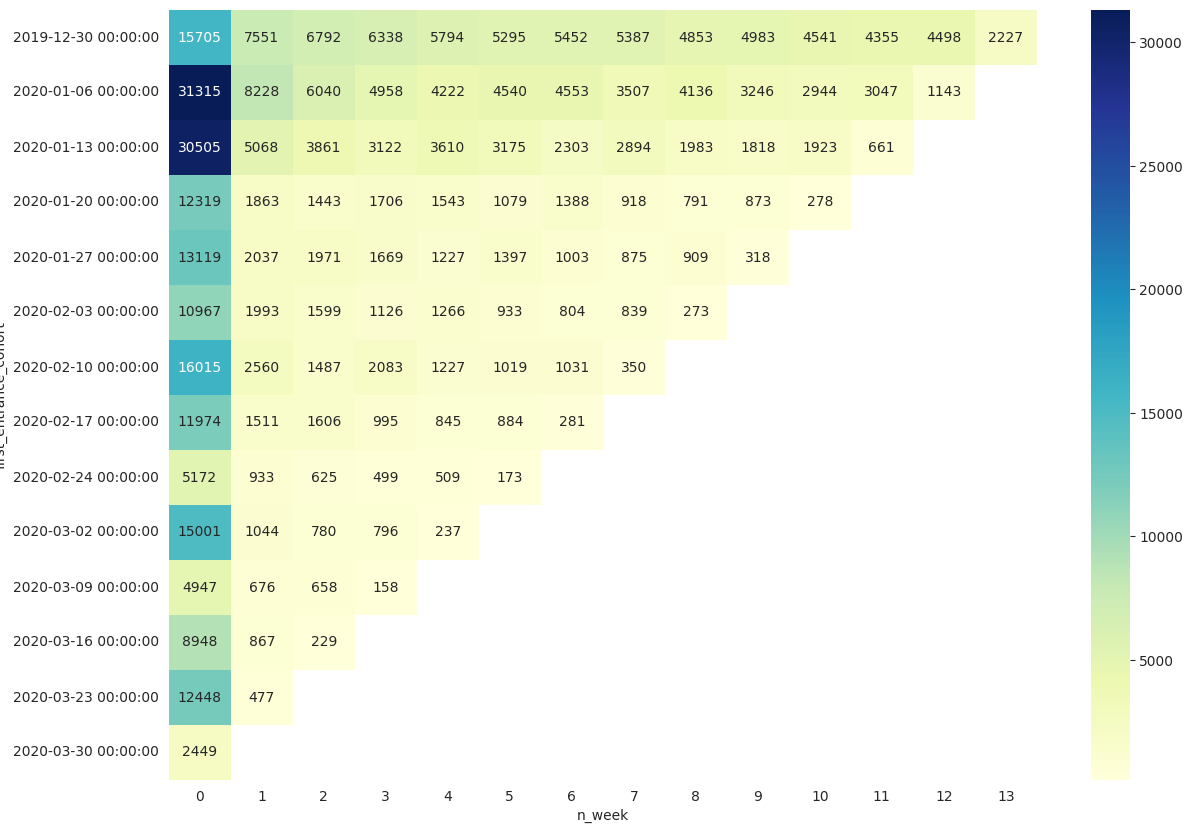

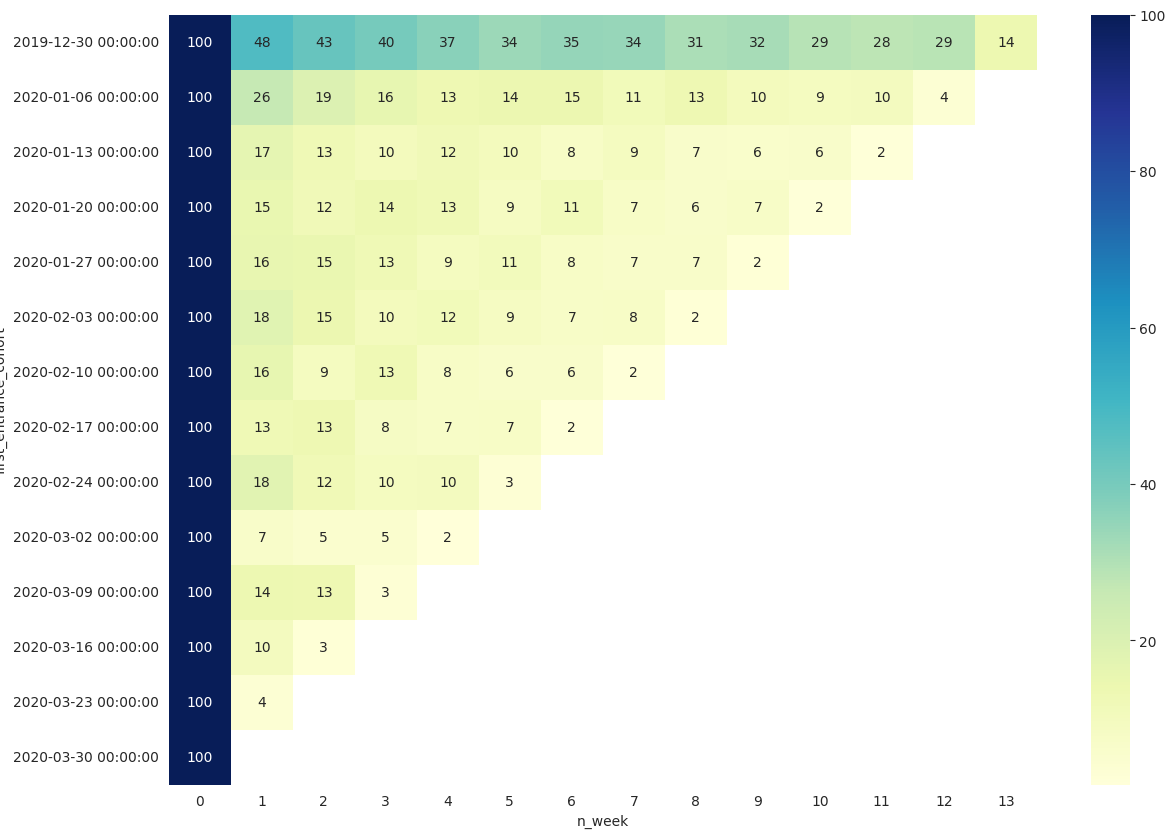

In [ ]:
#  И на последнем этапе мы уже строим heatmaps, чтобы оценить активность наших когорт:
viz = case.pivot_table(
                        index='first_entrance_cohort',
                        columns='n_week',
                        values='device_id',
                        aggfunc=pd.Series.nunique)



with sns.axes_style("white"): # в абсолютном соотношении
    f, ax = plt.subplots(figsize=(14, 10))
    ax = sns.heatmap(viz, annot=True, fmt=".0f", cmap="YlGnBu");



viz = viz.apply(lambda x: x*100/viz[0]) # в процентном соотношении
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(14, 10))
    ax = sns.heatmap(viz, annot=True, fmt=".0f", cmap="YlGnBu")

Таким образом, видим, что самая активная когорта в процентном соотношении- это когорта 2019-12-30. Хотя количество посещений не самое высокое в первую неделю.
Из таблицы видим, что не все пользователи регистрируются в первую неделю посещения.

Из тепловой карты видим, что самая активная когорта по неделе первой покупки-когорта от 2019-12-30. И, хотя по количеству покупок когорта от 2020-01-13 выглядит более результативной, когорта от 2020-01-06 принесла больше денег.Так, эта когорта более активная, чем 2020-01-13. И медианный чек у нее выше, что видно из последующего кода.

C:\Users\user\AppData\Local\Temp\ipykernel_17464\1755395812.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\user\AppData\Local\Temp\ipykernel_17464\1755395812.py:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\user\AppData\Local\Temp\ipykernel_17464\1755395812.py:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

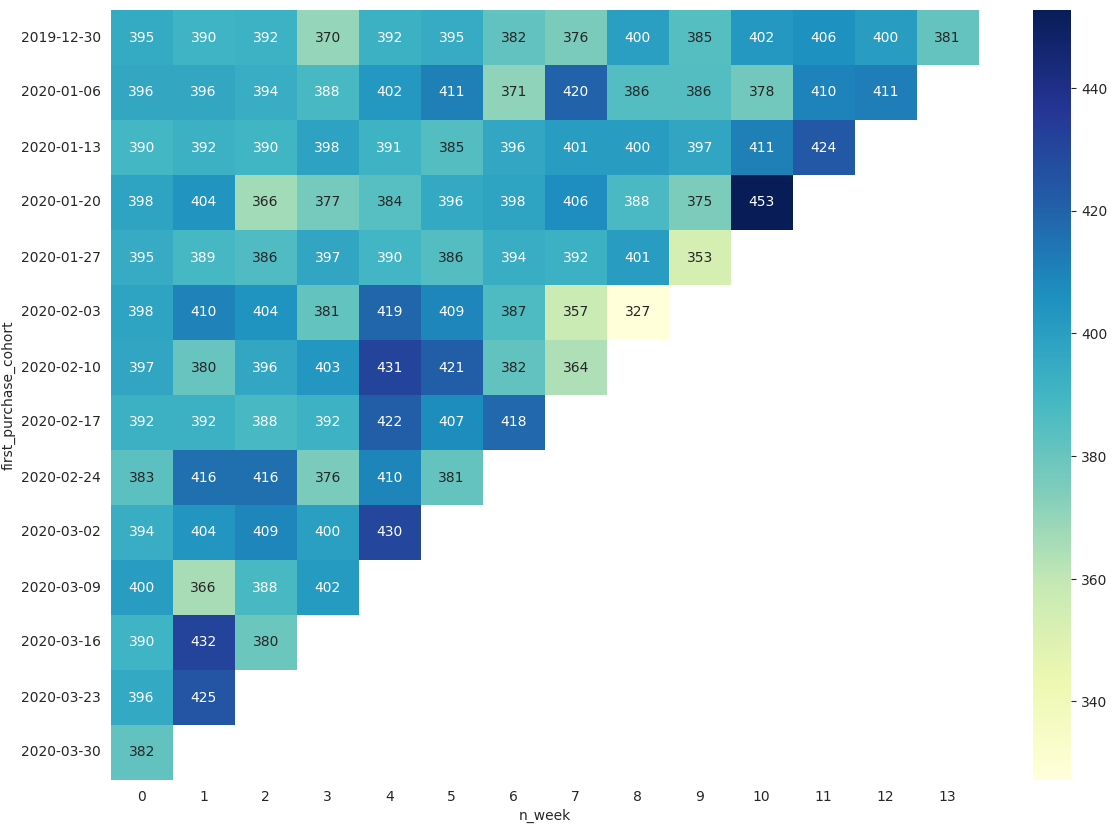

In [ ]:
# Когортный анализ по дате первой покупки

# Создаём переменную с данными пользователей, сделавших покупки и избавляемся от дубликатов по device_id:
purchases = case[case.event == 'purchase'].sort_values('date').drop_duplicates('device_id')

# Добавляем столбец с данными первой покупки:
case['first_purchase'] = case['device_id'].map(purchases.set_index('device_id')['date'])

# Добавляем столбец с временем первой покупки:
case['first_purchase'] = pd.to_datetime(case['first_purchase'], format = '%Y-%m-%d')

# Создаём новый датафрейм с данными пользователей, имеющих не пустые значения даты первой покупки:
top_cohort = case[-case['first_purchase'].isna()]
top_cohort['first_purchase_cohort'] = top_cohort['first_purchase'].apply(lambda x: x + dt.timedelta(days = -x.weekday(), weeks = 0))

#  Cчитаем разницу между date и first_purchase_cohort, ищем номер недели, приводим df3['first_purchase_cohort'] к формату строки:
top_cohort['date'] = pd.to_datetime(top_cohort['date'], format = '%Y-%m-%d')
top_cohort['n_week'] = top_cohort['date'] - top_cohort['first_purchase_cohort']
top_cohort['n_week'] = top_cohort['n_week'].apply(lambda x: x.days // 7)
top_cohort['first_purchase_cohort'] = top_cohort['first_purchase_cohort'].apply(lambda x: str(x)[:10])

# фильтруем датафрейм по только событию покупки и выводим сумму покупок каждой когорты по неделе первой покупки
top_cohort = top_cohort[top_cohort['event'] == 'purchase']
top_cohort.groupby('first_purchase_cohort')['purchase_sum'].sum().reset_index(name = 'LTV').sort_values('LTV', ascending = False)


# Визуализируем динамику по неделе первой покупки, выбор самой активной когорты и анализ динамики активности. Используем датафрейм top_cohort:
viz = top_cohort.pivot_table(
                        index='first_purchase_cohort',
                        columns='n_week',
                        values='purchase_sum',
                        aggfunc=np.median)


with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(14, 10))
    ax = sns.heatmap(viz, annot=True, fmt=".0f", cmap="YlGnBu")



In [ ]:
# Какая когорта принесла больше всего денег?

# фильтруем датафрейм только по событиям покупки
top_cohort = top_cohort[top_cohort['event'] == 'purchase']

# группируем по когортам первой покупки и находим в них сумму покупок, сортируем по убыванию
top_cohort.groupby('first_purchase_cohort')['purchase_sum'].sum().reset_index(name = 'LTV').sort_values('LTV', ascending = False)

,first_purchase_cohort,LTV
1,2020-01-06,19787838.0
2,2020-01-13,18852452.0
0,2019-12-30,12320177.5
3,2020-01-20,9018049.5
4,2020-01-27,7432634.0
6,2020-02-10,6766314.0
5,2020-02-03,6305237.0
7,2020-02-17,5398837.5
9,2020-03-02,3629773.0
8,2020-02-24,3067633.5


Таким образом, когорта 2020-01-06 принесла бошлье всего денег.В этой когорте же в первую неделю было и больше всего посещений.

In [ ]:
# у какой когорты выше медианный чек на неделе первой покупки?
top_cohort.groupby('first_purchase_cohort')['purchase_sum'].median().reset_index(name = 'Median_check').sort_values('Median_check', ascending = False)

,first_purchase_cohort,Median_check
6,2020-02-10,398.50
5,2020-02-03,398.00
1,2020-01-06,396.00
10,2020-03-09,396.00
12,2020-03-23,396.00
9,2020-03-02,395.50
11,2020-03-16,394.50
7,2020-02-17,393.75
4,2020-01-27,393.50
3,2020-01-20,393.00


Таким образом, самый высокий медианный чек у когорты от 2020-03-09.

In [ ]:
# расчитываем средний чек по неделям первой покупки
top_cohort.groupby('first_purchase_cohort')['purchase_sum'].mean().reset_index(name = 'Mean_check').sort_values('Mean_check', ascending = False)

,first_purchase_cohort,Mean_check
13,2020-03-30,747.067775
8,2020-02-24,736.349856
5,2020-02-03,731.041971
12,2020-03-23,727.817999
10,2020-03-09,726.678609
3,2020-01-20,718.626942
1,2020-01-06,710.030428
11,2020-03-16,708.462032
7,2020-02-17,706.469183
0,2019-12-30,705.986906


Видим, что средний чек самый высокий у когорты 2020-03-30.

In [ ]:
# Сравниваем медианный чек на второй неделе с момента первой покупки для всех каналов привлечения.

# находим только пользователей 2-ой недели
df2week=top_cohort[top_cohort['n_week']==1]


In [ ]:
# группируем датафрейм по каналам привлечения и находим медианный чек по каждому из них
df2week.groupby('utm_source')['purchase_sum'].median().sort_values( ascending = False)

utm_source
instagram_ads    414.00
-                400.50
vk_ads           398.00
facebook_ads     396.00
yandex-direct    390.50
google_ads       385.00
referal          376.25
Name: purchase_sum, dtype: float64

Таким образом, самый высокий медианный чек у канала Instagramm.
Это значит, что маркетологам следует уделять больше внимания каналам Instagramm,vk,facebook и меньше затрачивать ресурсы на Реферальную программу.